<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/New_MachinLearning/exam_08_classification_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## fashion_mnist 를 사용해 십진분류기 만들기(10가지 패션소품)



In [ ]:
# 모듈 불러오기

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras import datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
#패션소품에 각각 이름 붙여주기

label = ['Tshirst', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag',' ankle boot']

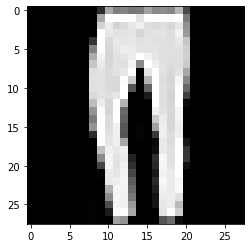

1
[[  0   0   0   0   0   0   0   0   0  43 168 125 131 122 123 161 137 140
  135 183  73   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 167 255 255 255 255 226 255 255 252
  251 255 122   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 212 236 212 219 232 238 222 219 223
  216 230 148   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 255 232 227 226 229 214 224 228 227
  221 243 153   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  52 255 219 232 230 231 225 227 224 224
  223 232 198   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 128 255 215 229 236 236 228 228 228 224
  223 225 206   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 173 243 213 225 229 237 255 243 230 224
  222 223 209   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 198 234 215 226 224 243 136 255 238 226
  221 223 203   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 223 227 219 226 231 255   0 

In [ ]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap='gray')
plt.show()
print(Y_train[my_sample])
print(X_train[my_sample])

#28x28개의 픽셀인데 값이 있는 데이터만 밝기로 표현한 것

In [ ]:
#원본데이터와 달리쓰기위해 소문자로 바꾼다  <대문자 = 이미지, 소문자 = 딥러닝에 사용>
#라벨을 원핫인코딩으로 바꿔주는 것이 to_categorical
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [ ]:
#원핫인코딩 확인하기, 모델에 사용하기 위해서 픽셀값들을 원핫인코딩으로 바꿈

print(Y_train[11])
print(y_train[11])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
#reshape(-1, 28 * 28)  = 이미지데이터는 기존 데이터보다 차원이 커서 dense에 못 넣기 때문에 차원이 1차원이여야 해서 해주는 것

x_train = X_train.reshape(-1, 28 * 28)  # 28 * 28= 784
x_test = X_test.reshape(-1, 28 * 28)
x_train = x_train / 255   #스케일링 작업 흑백 이미지 데이터는 픽셀 하나당 0-255까지의 숫자값을 가지므로 이를 255로 나누면 0-1 사이로 normalize된다(minmaxscaler 와 동일)
x_test = x_test / 255
print(x_train.shape)

(60000, 784)


In [ ]:
# 모델 레이어 설정
model = Sequential()
model.add(Dense(256, input_dim=784,
                activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))  #숫자가 0~9라서 타겟수가 10개라서 10

In [ ]:
# 컴파일설정

opt = Adam(lr=0.01)
model.compile(opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#모델 학습하기
fit_hist = model.fit(x_train, y_train,batch_size=500, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
96/96 [==============================] - 1s 5ms/step - loss: 0.7726 - accuracy: 0.7432 - val_loss: 0.4598 - val_accuracy: 0.8278
Epoch 2/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4046 - accuracy: 0.8545 - val_loss: 0.3997 - val_accuracy: 0.8581
Epoch 3/50
96/96 [==============================] - 0s 3ms/step - loss: 0.3581 - accuracy: 0.8697 - val_loss: 0.3903 - val_accuracy: 0.8589
Epoch 4/50
96/96 [==============================] - 0s 4ms/step - loss: 0.3381 - accuracy: 0.8760 - val_loss: 0.3691 - val_accuracy: 0.8657
Epoch 5/50
96/96 [==============================] - 0s 3ms/step - loss: 0.3157 - accuracy: 0.8838 - val_loss: 0.3691 - val_accuracy: 0.8708
Epoch 6/50
96/96 [==============================] - 0s 4ms/step - loss: 0.2994 - accuracy: 0.8887 - val_loss: 0.3380 - val_accuracy: 0.8779
Epoch 7/50
96/96 [==============================] - 0s 3ms/step - loss: 0.2867 - accuracy: 0.8946 - val_loss: 0.3399 - val_accuracy: 0.8758
Epoch 8/50
96/96 [==

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Final test set accuracy :', score[1])

Final test set accuracy : 0.8766999840736389


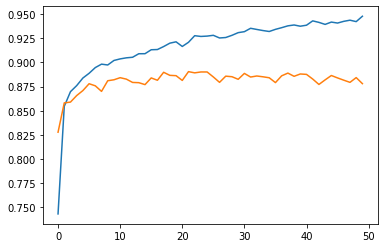

In [ ]:
#plt으로 학습률 확인하기

plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])

coat
[[3.0929531e-04 3.6971207e-07 4.2859923e-02 7.2211954e-03 8.8026005e-01
  8.3586320e-09 6.9332331e-02 7.7113754e-08 1.6658003e-05 3.4629185e-08]]
coat


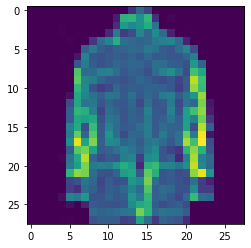

In [ ]:
#정확률을 보기위해 임의의 그림을 주었을 때 숫자가 정확히 나오는 지 확인하기

my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample])
print(label[Y_test[my_sample]])
pred = model.predict(x_test[my_sample].reshape(-1, 784))
print(pred)
print(label[np.argmax(pred)])

[[3.0929531e-04 3.6971207e-07 4.2859923e-02 7.2211954e-03 8.8026005e-01  
  8.3586320e-09 6.9332331e-02 7.7113754e-08 1.6658003e-05 3.4629185e-08]]

  위 fashion 결과에서 맨 뒤에 -nn숫자를 보고 nn이 제일 작은 숫자가 결과로 나온다  
  argmax는 제일 큰 숫자의 인덱스를 리턴해준 것으로 라벨인덱싱을 해서 글이 나오게된다

In [ ]:
#argmax 란 제일 큰 값의 인덱스 값을 리턴해준다

a = [1, 4, 8, 3, 7, 2]
np.argmax(a)

2